In [2]:
# Import our dependencies
 
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

### For data clean up pls refer to CleanUp file 

# **Preprocessing Model 2 - Characteristics of a Horse winner**

 Step 1: Read the filtered_df_tree.csv data from the Resources folder into a Pandas DataFrame.

In [3]:
file_path = r'C:\Users\aumek\OneDrive\Desktop\Git_Personnal_Rep\Resource_mustang\converted_tree_df.csv'

# Read the CSV file into pandas
random_forest = pd.read_csv(file_path)
random_forest.head(5)


,rid,winningTime,metric,ncond,class,condition,horseName,trainerName,jockeyName,age,...,outHandicap,RPR,saddle,father,TR,OR,runners,weight,res_win,res_place
0,10312,253.88,3218.0,10,4,Good To Soft,Waterproof,Shaun Keightley,Brendan Powell,4.0,...,2.541359,103.0,9.0,Pour Moi,103.0,80.446685,9.0,66.0,1.0,1.0
1,10312,253.88,3218.0,10,4,Good To Soft,Eva's Diva,Phil Middleton,Mr Sam Lee,6.0,...,2.541359,96.0,7.0,Getaway,89.0,110.000000,9.0,65.0,0.0,1.0
2,10312,253.88,3218.0,10,4,Good To Soft,Incredible Dream,Conrad Allen,Joshua Moore,7.0,...,2.541359,97.0,5.0,Vale Of York,88.0,80.446685,9.0,72.0,0.0,1.0
3,10312,253.88,3218.0,10,4,Good To Soft,Hats Off To Larry,Mick Channon,Marc Goldstein,6.0,...,2.541359,89.0,4.0,Sixties Icon,75.0,80.446685,9.0,72.0,0.0,0.0
4,10312,253.88,3218.0,10,4,Good To Soft,Taqwaa,Laura Morgan,Richie McLernon,7.0,...,2.541359,82.0,6.0,Iffraaj,67.0,80.446685,9.0,72.0,0.0,0.0


In [4]:
# Determine the number of unique values in each column.
unique_application = random_forest.nunique()
print(unique_application)

rid            14077
winningTime     8692
metric            53
ncond             18
class              8
condition         18
horseName      44803
trainerName     4250
jockeyName      2822
age               16
isFav              2
position          35
distance           8
outHandicap       27
RPR              178
saddle            36
father          2691
TR               158
OR               171
runners           27
weight            34
res_win            2
res_place          2
dtype: int64


In [5]:
if "res_win" in random_forest.columns:
    print("Column 'res_win' is present in the dataset.")
else:
    print("Column 'res_win' is not present in the dataset.")

Column 'res_win' is present in the dataset.


In [6]:
# Look at res_win value counts for binning - where 0=did not win; 1=won
application_type_counts = random_forest['res_win'].value_counts()
application_type_counts

res_win
0.0    128817
1.0     14094
Name: count, dtype: int64

In [7]:
# Check for missing values (NaN)
nan_columns = random_forest.columns[random_forest.isnull().any()].tolist()
print("Columns with NaN values:")
print(nan_columns)

Columns with NaN values:
[]


In [8]:
# columns_with_null = ['distance']

# # Replace null values with the mean of each column
# for column in columns_with_null:
#     decision_tree[column].fillna(decision_tree[column].mean(), inplace=True)

# # Verify that null values are replaced
# nan_columns = decision_tree.columns[decision_tree.isnull().any()].tolist()
# print("Columns with NaN values after replacement:")
# print(nan_columns)

In [9]:
num_rows = random_forest.shape[0]
num_columns = random_forest.shape[1]
print("Number of Rows:", num_rows)
print("Number of Columns:", num_columns)

Number of Rows: 142911
Number of Columns: 23


In [10]:
sampled_df = random_forest.sample(n=15000, random_state=42)
num_rows = sampled_df.shape[0]
num_columns = sampled_df.shape[1]
print("Number of Rows:", num_rows)
print("Number of Columns:", num_columns)

Number of Rows: 15000
Number of Columns: 23


In [11]:
encoded_df = pd.get_dummies(sampled_df)
encoded_df.head(5)

,rid,winningTime,metric,ncond,class,age,isFav,position,distance,outHandicap,...,father_Zambezi Sun,father_Zamindar,father_Zanzibari,father_Zebedee,father_Zed,father_Zenno Rob Roy,father_Zerpour,father_Zivo,father_Zoffany,father_Zoustar
101353,410815,222.40,3218.0,1,4,6.0,0.0,5.0,2.0,2.541359,...,False,False,False,False,False,False,False,False,False,False
29275,401605,93.58,1407.0,12,0,3.0,0.0,11.0,1407.0,2.541359,...,False,False,False,False,False,False,False,False,False,False
92053,409839,107.79,1810.0,8,0,4.0,0.0,1.0,1.0,2.541359,...,False,False,False,False,False,False,False,False,False,False
38706,404193,300.77,4323.5,3,0,6.0,0.0,40.0,2.0,2.541359,...,False,False,False,False,False,False,False,False,False,False
86312,409139,88.24,1407.0,0,5,9.0,0.0,11.0,1407.0,2.541359,...,False,False,False,False,False,False,False,False,False,False


### Further steps in the model-building process: feature selection, model selection, training, and evaluation ###

In [12]:
 # Define features set
features = encoded_df.copy()
features.drop("res_win", axis=1, inplace=True)
features.head()


,rid,winningTime,metric,ncond,class,age,isFav,position,distance,outHandicap,...,father_Zambezi Sun,father_Zamindar,father_Zanzibari,father_Zebedee,father_Zed,father_Zenno Rob Roy,father_Zerpour,father_Zivo,father_Zoffany,father_Zoustar
101353,410815,222.40,3218.0,1,4,6.0,0.0,5.0,2.0,2.541359,...,False,False,False,False,False,False,False,False,False,False
29275,401605,93.58,1407.0,12,0,3.0,0.0,11.0,1407.0,2.541359,...,False,False,False,False,False,False,False,False,False,False
92053,409839,107.79,1810.0,8,0,4.0,0.0,1.0,1.0,2.541359,...,False,False,False,False,False,False,False,False,False,False
38706,404193,300.77,4323.5,3,0,6.0,0.0,40.0,2.0,2.541359,...,False,False,False,False,False,False,False,False,False,False
86312,409139,88.24,1407.0,0,5,9.0,0.0,11.0,1407.0,2.541359,...,False,False,False,False,False,False,False,False,False,False


In [13]:
# Define target vector
target = encoded_df["res_win"].values.reshape(-1, 1)
target[:5]


array([[0.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [14]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=78)

In [15]:
# Creating StandardScaler instance
scaler = StandardScaler()


In [16]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)


In [17]:
 # Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

 ## Fitting the Decision Tree Model

In [18]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)
# Reshape the target vector y using ravel()
y_train = y_train.ravel()

In [19]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

##  Making Predictions Using the Tree Model

In [20]:
 # Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

 ## Model Evaluation

In [21]:
 # Calculating the confusion matrix
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [22]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,3374,0
Actual 1,0,376


Accuracy Score : 1.0
Classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3374
         1.0       1.00      1.00      1.00       376

    accuracy                           1.00      3750
   macro avg       1.00      1.00      1.00      3750
weighted avg       1.00      1.00      1.00      3750



## Feature Importance

In [24]:
random_forest.columns

Index(['rid', 'winningTime', 'metric', 'ncond', 'class', 'condition',
       'horseName', 'trainerName', 'jockeyName', 'age', 'isFav', 'position',
       'distance', 'outHandicap', 'RPR', 'saddle', 'father', 'TR', 'OR',
       'runners', 'weight', 'res_win', 'res_place'],
      dtype='object')

In [33]:
# Filter the top 10 winner horses
top_10_winners = random_forest[random_forest['res_win'] == 1].head(10)

# Select the desired features for printing
features_to_print = ['jockeyName', 'father', 'isFav', 'RPR','class', 'age' ]



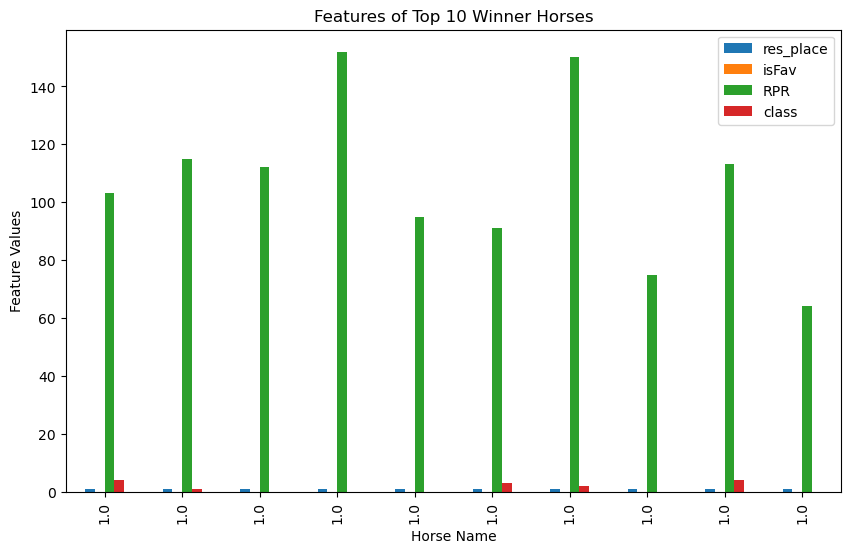

In [35]:
import matplotlib.pyplot as plt

# Filter the top 10 winner horses
top_10_winners = random_forest[random_forest['res_win'] == 1].head(10)

# Select the desired features for printing
features_to_print = ['position', 'res_place', 'isFav', 'RPR','class']

# Plot the features for the top 10 winner horses
top_10_winners[features_to_print].plot(kind='bar', x='position', figsize=(10, 6))

# Set the plot title and axis labels
plt.title('Features of Top 10 Winner Horses')
plt.xlabel('Horse Name')
plt.ylabel('Feature Values')

# Display the plot
plt.show()


In [30]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, features.columns), reverse=True)

[(0.44203778311688413, 'position'),
 (0.0938822468105832, 'res_place'),
 (0.0186421360722969, 'isFav'),
 (0.01661600584762422, 'RPR'),
 (0.013204015107359251, 'TR'),
 (0.01010083365690208, 'runners'),
 (0.009982049417518577, 'winningTime'),
 (0.009803444767648382, 'rid'),
 (0.008773130639247843, 'saddle'),
 (0.007881967041448364, 'OR'),
 (0.0074773517892682126, 'weight'),
 (0.006746896942919167, 'metric'),
 (0.006051592860237859, 'age'),
 (0.0046861950736103095, 'ncond'),
 (0.004124412650144445, 'class'),
 (0.003556115196284491, 'distance'),
 (0.0017559624159557267, 'condition_Good'),
 (0.0013025065718522831, 'condition_Soft'),
 (0.001225859204479369, 'trainerName_W P Mullins'),
 (0.0011135572018121818, 'condition_Heavy'),
 (0.0011092253052193874, 'condition_Good To Soft'),
 (0.00105720316998007, 'condition_Standard'),
 (0.0009116823507098426, 'condition_Good To Firm'),
 (0.0008398681220197022, "jockeyName_Jonjo O'Neill Jr"),
 (0.000772863773019852, 'trainerName_Paul Nicholls'),
 (0.00

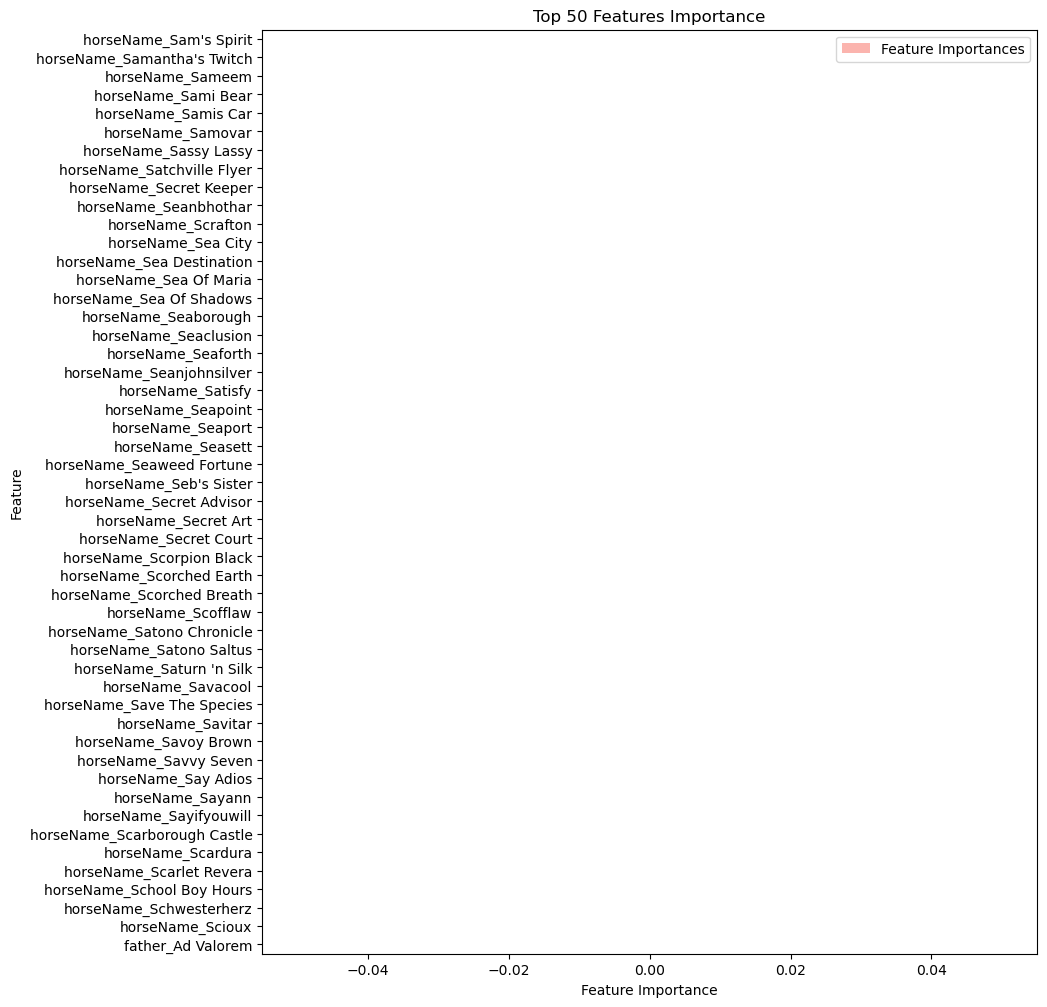

In [32]:
import matplotlib.pyplot as plt

# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, features.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')

# Select the top 50 features
top_50_features = importances_sorted.iloc[:50]

# Plot the top 50 features as stacked horizontal bars
top_50_features.plot(kind='barh', stacked=True, colormap='Pastel1', figsize=(10, 12))

# Set the plot title and axis labels
plt.title('Top 50 Features Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')

# Display the plot
plt.show()


In [ ]:
 # Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, features.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

<AxesSubplot:title={'center':'Features Importances'}, ylabel='1'>